In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
# Load the dataset
data_file = r"C:\Users\Downloads\archive (1)\Telco_customer_churn.xlsx"
data = pd.read_excel(data_file)

In [8]:
# Data Overview
print("Data Overview:\n", data.head())
print("\nData Info:\n")
data.info()

Data Overview:
    CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Mont

In [9]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [10]:
# Drop unnecessary columns for analysis
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude']
data = data.drop(columns=columns_to_drop)

In [11]:
# Encode categorical variables
categorical_columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label'
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [12]:
# Handle missing or invalid data in numeric columns
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.fillna({'Total Charges': data['Total Charges'].mean()}, inplace=True)

In [13]:
# Feature and Target Splitting
X = data.drop(columns=['Churn Value', 'Churn Label', 'Churn Reason'])
y = data['Churn Value']

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

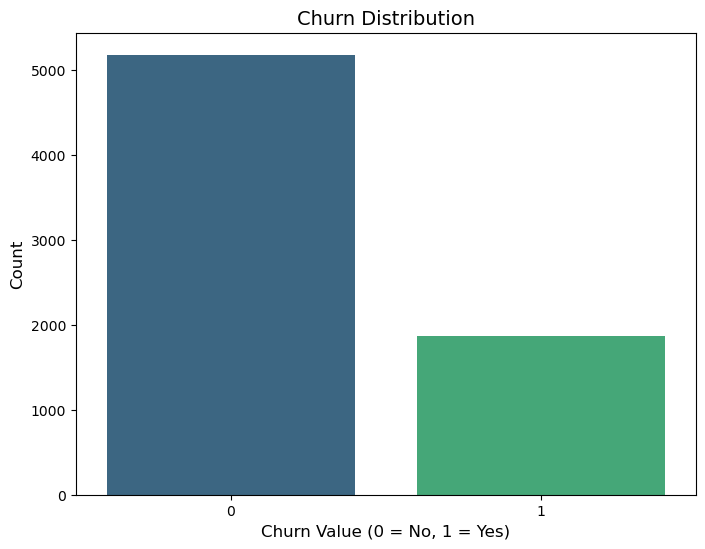

In [16]:
# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn Value', palette='viridis')
plt.title('Churn Distribution', fontsize=14)
plt.xlabel('Churn Value (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

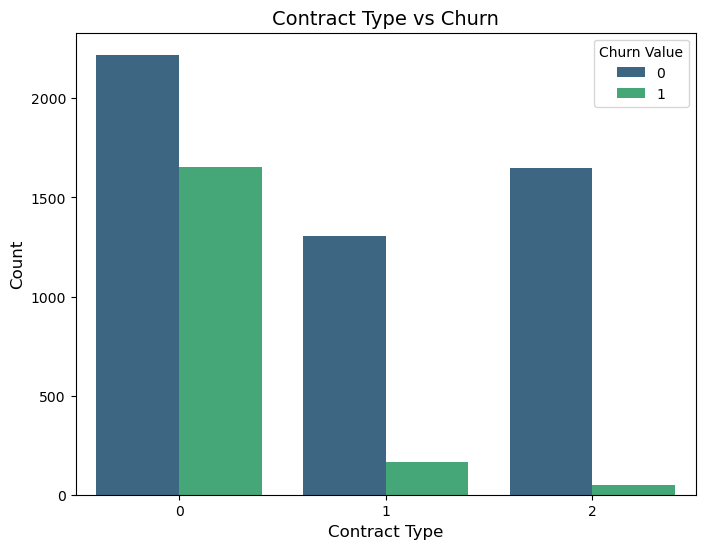

In [17]:
# Contract Type vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Contract', hue='Churn Value', palette='viridis')
plt.title('Contract Type vs Churn', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Value', loc='upper right')
plt.show()

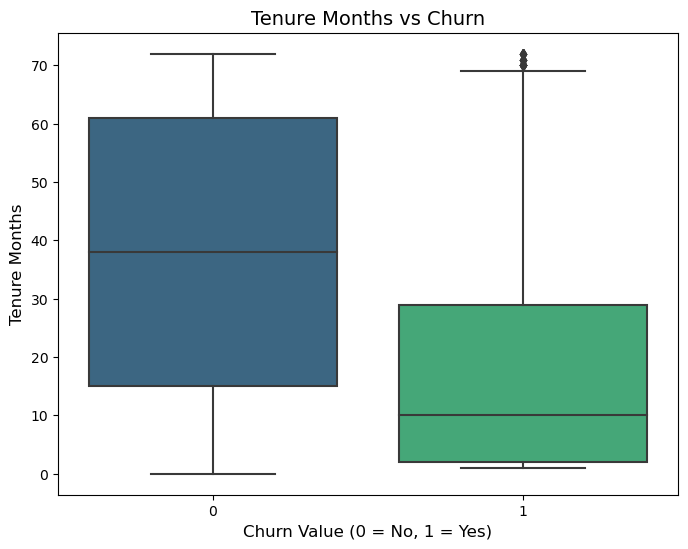

In [19]:
# Tenure Months vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Churn Value', y='Tenure Months', palette='viridis')
plt.title('Tenure Months vs Churn', fontsize=14)
plt.xlabel('Churn Value (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Tenure Months', fontsize=12)
plt.show()

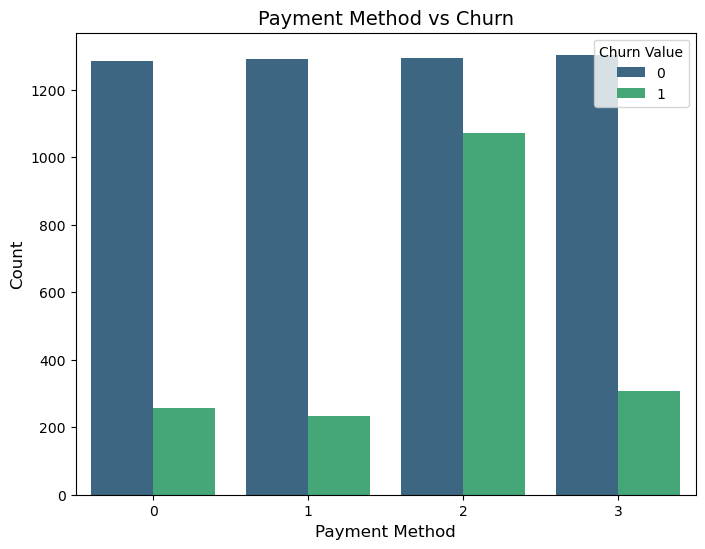

In [20]:
# Payment Method vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment Method', hue='Churn Value', palette='viridis')
plt.title('Payment Method vs Churn', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Value', loc='upper right')
plt.show()

In [21]:
# Model Training - Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 0.4235 - accuracy: 0.7994 - val_loss: 0.2564 - val_accuracy: 0.8962
Epoch 2/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8769 - val_loss: 0.2002 - val_accuracy: 0.9166
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.8990 - val_loss: 0.1820 - val_accuracy: 0.9237
Epoch 4/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9084 - val_loss: 0.1762 - val_accuracy: 0.9264
Epoch 5/20
141/141 [==============================] - 0s 1ms/step - loss: 0.1998 - accuracy: 0.9144 - val_loss: 0.1736 - val_accuracy: 0.9335
Epoch 6/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9135 - val_loss: 0.1750 - val_accuracy: 0.9281
Epoch 7/20
141/141 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9168 - val_loss: 0.1711 - val_accuracy: 0.9299
Epoch 

In [23]:
# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

45/45 [==============================] - 0s 743us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1009
           1       0.86      0.82      0.84       400

    accuracy                           0.91      1409
   macro avg       0.90      0.89      0.89      1409
weighted avg       0.91      0.91      0.91      1409


Accuracy: 0.9127040454222853


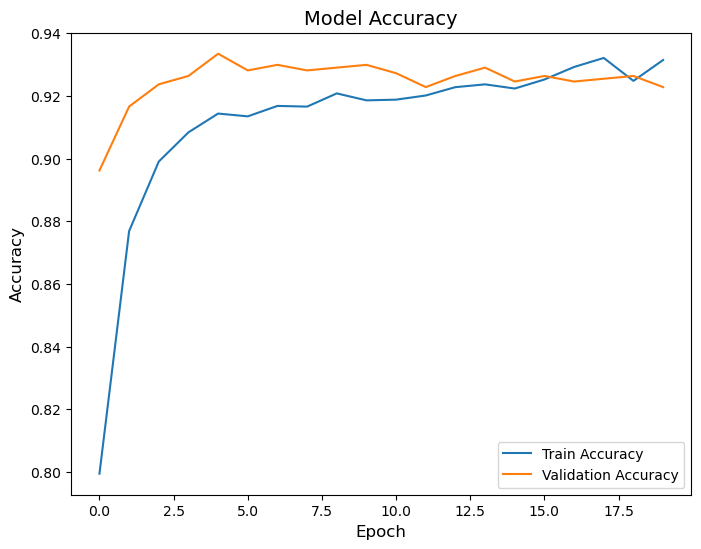

In [24]:
# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.show()

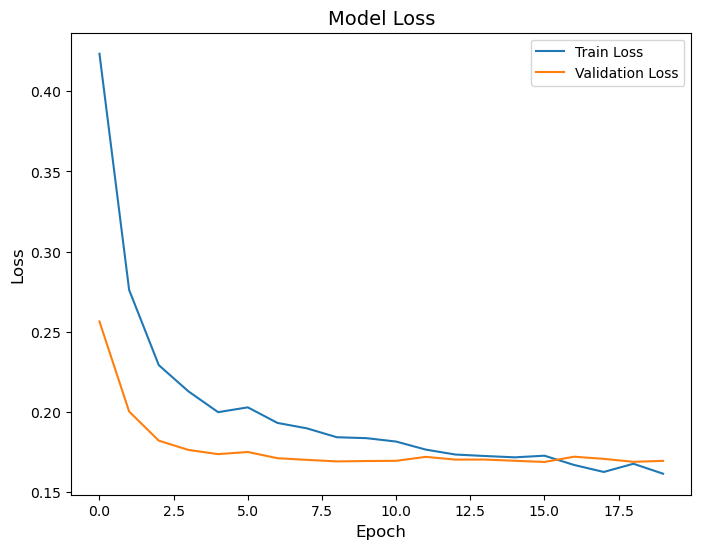

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()